In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense


Dataset Preview:
        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


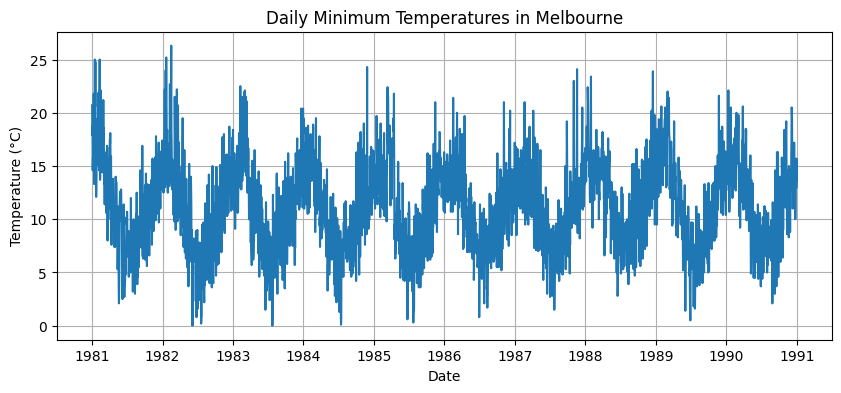

In [11]:
# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])

# Preview data
print("Dataset Preview:")
print(df.head())

# Plot
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Temp'])
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [12]:
# Normalize temperature values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Temp']].values)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Reshape inputs for RNN: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [13]:
def build_model(model_type='RNN', input_shape=(10,1)):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(64, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(64, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


In [14]:
#  Training RNN Model
print("\n Training RNN Model...")
rnn_model = build_model('RNN')
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1  # Show progress per epoch
)



📚 Training RNN Model...
Epoch 1/20


C:\Users\Akshath\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198 - val_loss: 0.0093
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0095
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 - val_loss: 0.0095
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0093
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0094
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0097
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0097


In [15]:
#  Trainig LSTM Model
print("\n Training LSTM Model...")
lstm_model = build_model('LSTM')
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1  # Show progress per epoch
)



📚 Training LSTM Model...
Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0352 - val_loss: 0.0104
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0104
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0098
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [16]:
# 📚 Training GRU Model
print("\nTraining GRU Model...")
gru_model = build_model('GRU')
history_gru = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1  # Show progress per epoch
)



📚 Training GRU Model...
Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0669 - val_loss: 0.0118
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

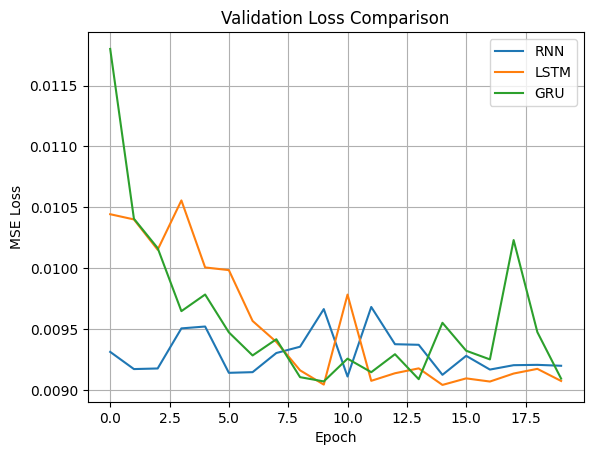

In [17]:
plt.plot(history_rnn.history['val_loss'], label='RNN')
plt.plot(history_lstm.history['val_loss'], label='LSTM')
plt.plot(history_gru.history['val_loss'], label='GRU')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
print("\nEvaluating RNN...")
rnn_test_loss = rnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (RNN): {rnn_test_loss:.4f}")

print("\n Evaluating LSTM...")
lstm_test_loss = lstm_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (LSTM): {lstm_test_loss:.4f}")

print("\n Evaluating GRU...")
gru_test_loss = gru_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (GRU): {gru_test_loss:.4f}")



🔍 Evaluating RNN...
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 
Test Loss (RNN): 0.0073

🔍 Evaluating LSTM...
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Test Loss (LSTM): 0.0072

🔍 Evaluating GRU...
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 
Test Loss (GRU): 0.0072


In [19]:
print("\nFinal Comparison Table")
print(f"RNN  Test Loss: {rnn_test_loss:.4f}")
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")
print(f"GRU  Test Loss: {gru_test_loss:.4f}")



📊 Final Comparison Table
RNN  Test Loss: 0.0073
LSTM Test Loss: 0.0072
GRU  Test Loss: 0.0072


In [23]:
rnn_loss = history_rnn.history['loss']
lstm_loss = history_lstm.history['loss']
gru_loss = history_gru.history['loss']


In [24]:
def get_convergence_epoch(losses, threshold=0.1):
    for i, loss in enumerate(losses):
        if loss < threshold:
            return i + 1  # 1-based index
    return len(losses)


In [26]:
print(f"RNN Final Loss: {rnn_loss[-1]:.6f}")
print(f"LSTM Final Loss: {lstm_loss[-1]:.6f}")
print(f"GRU Final Loss: {gru_loss[-1]:.6f}")


RNN Final Loss: 0.009063
LSTM Final Loss: 0.008921
GRU Final Loss: 0.009228
